# Stats and Public Health deliverable - Part 1

#### Author: Amirhossein Kiani
#### Contact: amirkianitech@gmail.com
#### Date: 06/12/2023

### Table of Contents

- [Part 0 - Importing libraries and exploring the dataset](#part-0)
- [Part 1 - Basic Analysis](#part-1)
- [Part 2 - Statistical Analysis](#part-2)
- [Part 2 - Advanced Statistical Analysis](#part-3)

# PART 0. Importing libraries and exploring the dataset <a class ='author' id='part-0'></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mosquito_data.csv')

In [3]:
df.sample(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
13899,2007,37,131XX S TORRENCE AVE,131,T203,GRAVID,2007-09-19 00:09:00,11,Pip,negative,CULEX PIPIENS,41.656789,-87.559440
9215,2011,39,100XX W OHARE,100,T904,GRAVID,2011-09-30 00:09:00,3,Res,negative,CULEX RESTUANS,NaN,NaN
7429,2013,32,25XX S MILLARD AVE,25,T152,GRAVID,2013-08-08 00:08:00,3,Pip,negative,CULEX PIPIENS,41.845715,-87.715899
12947,2008,34,100XX W OHARE AIRPORT,100,T905,GRAVID,2008-08-26 00:08:00,1,Pip,negative,CULEX PIPIENS,NaN,NaN
4998,2015,25,52XX W 63RD ST,52,T065,GRAVID,2015-06-25 00:06:00,1,Res,negative,CULEX RESTUANS,41.778305,-87.754366
9491,2011,34,4XX W 127TH,4,T135,GRAVID,2011-08-26 00:08:00,1,Pip,negative,CULEX PIPIENS,NaN,NaN
13525,2008,27,35XX W 116TH ST,35,T158,GRAVID,2008-07-04 00:07:00,3,Res,negative,CULEX RESTUANS,41.682180,-87.710092
16560,2007,32,131XX S BRANDON AVE,131,T209,GRAVID,2007-08-17 00:08:00,37,Pip,positive,CULEX PIPIENS,41.657070,-87.546039
13045,2008,33,15XX W WEBSTER AVE,15,T045,GRAVID,2008-08-19 00:08:00,1,Res,negative,CULEX RESTUANS,41.921705,-87.666963
14556,2007,32,15XX N LONG AVE,15,T153,GRAVID,2007-08-15 00:08:00,20,Pip,negative,CULEX PIPIENS,41.909340,-87.761078


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [5]:
df.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


## PART 1. Basic Data Wrangling<a class ='author' id='part-1'></a>

## 1. What is the shape of the dataframe?


In [6]:
df.shape

(18495, 13)

The shape of the dataframe is (18495, 13)

## 2. Convert the 'Date' column to have a datetime format.


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

We can now see that the data type of the Date column has changed to datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


## 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

#### Numeric:  
   #1. `Year` -> stores the year the WNV test is performed
   
   #2. `Week` -> stores the week the WNV test is performed

#### Categoric: 
   #1. `WNV Present` -> stores whether West Nile Virus was present in these mosquitos ("positive" or "negative")
   
   #2. `Species` -> stores Mosquito species

#### Distribution of `Year`

In [10]:
df['Year'].nunique()

13

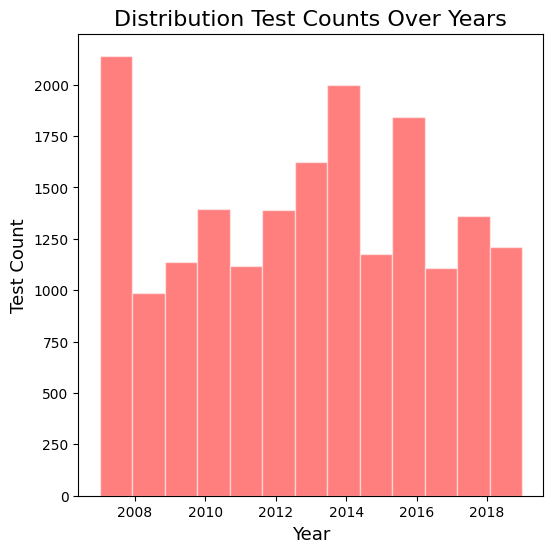

In [23]:
plt.figure(figsize=(6,6))
df['Year'].plot(kind='hist',color='red',bins=13,edgecolor='white',alpha=.5)

plt.title('Distribution Test Counts Over Years', size=16)
plt.xlabel('Year', size=13)
plt.ylabel('Test Count', size=13)
plt.show()

#### Distribution of `Week`

In [14]:
df['Week'].nunique()

21

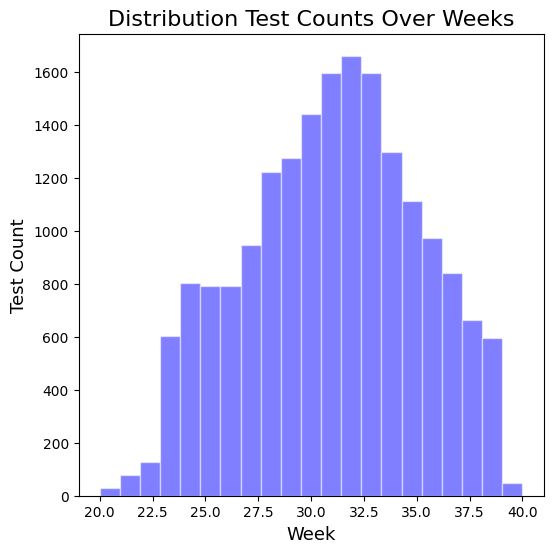

In [22]:
plt.figure(figsize=(6,6))
df['Week'].plot(kind='hist',color='blue',bins=21,edgecolor='white',alpha=.5)

plt.title('Distribution Test Counts Over Weeks', size=16)
plt.xlabel('Week', size=13)
plt.ylabel('Test Count', size=13)
plt.show()

#### Distribution of `WNV Present`

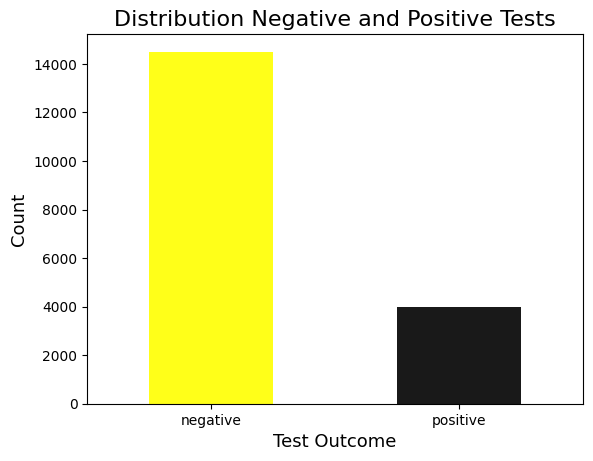

In [34]:
df['WNV Present'].value_counts().plot(kind='bar',color=['yellow','black'],alpha=.9)

plt.title('Distribution Negative and Positive Tests', size=16)
plt.xlabel('Test Outcome', size=13)
plt.ylabel('Count', size=13)
plt.xticks(rotation=0)
plt.show()

#### Distribution of `Species`

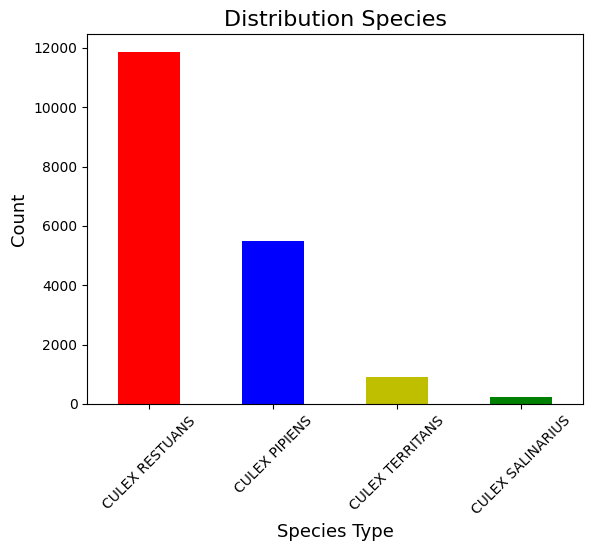

In [24]:
df['Species'].value_counts().plot(kind='bar',color=list('rbyg'))

plt.title('Distribution Species', size=16)
plt.xlabel('Species Type', size=13)
plt.ylabel('Count', size=13)
plt.xticks(rotation=45)
plt.show()

## 4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

Yes, there are 658 duplicate columns:

In [35]:
df.duplicated().sum()

658

In [36]:
# Dropping duplicate columns:

df.drop_duplicates(inplace=True)

Now we have dropped all the redunddant columns:

In [37]:
df.duplicated().sum()

0

## 5. Are there any null values in the dataframe? If so, deal with them appropriately.


Yes, there are 2266 null values in the Lat and Lon columns:


In [38]:
df.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

### Dealing with null values:

#### Method 1. 
An easy and reasonable way to deal with the missing values is to use a an interpolation algorithm, such as the following:

```python
df['Lon'].interpolate(method='linear', inplace=True)

df['Lat'].interpolate(method='linear', inplace=True)
```

#### Method 2. 
I'll instead explore the data set and see if I can come up with an alternative way of filling the missing values, perhaps based on the effect of other variables in the dataframe.

I first take a look at the dataframe, by extracting 20 sample rows, to see if I can find any interesting pattern.

In [40]:
df[df['Lat'].isna()].sample(20)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
11615,2010,22,100XX W OHARE AIRPORT,100,T918,GRAVID,2010-06-02 00:06:00,4,Res,negative,CULEX RESTUANS,NaN,NaN
3070,2016,39,79XX S CHICAGO,79,T083,GRAVID,2016-09-29 00:09:00,4,Res,negative,CULEX RESTUANS,NaN,NaN
11209,2010,28,100XX W OHARE AIRPORT,100,T906,GRAVID,2010-07-19 00:07:00,3,Pip,negative,CULEX PIPIENS,NaN,NaN
9978,2011,28,100XX W OHARE AIRPORT,100,T902,GRAVID,2011-07-15 00:07:00,47,Res,negative,CULEX RESTUANS,NaN,NaN
10043,2011,27,100XX W OHARE AIRPORT,100,T901,GRAVID,2011-07-11 00:07:00,2,Pip,negative,CULEX PIPIENS,NaN,NaN
12656,2009,21,100XX W OHARE AIRPORT,100,T913,GRAVID,2009-06-03 00:06:00,9,Res,negative,CULEX RESTUANS,NaN,NaN
13422,2008,28,100XX W OHARE AIRPORT,100,T900,GRAVID,2008-07-14 00:07:00,1,Pip,negative,CULEX PIPIENS,NaN,NaN
1456,2018,31,100XX W OHARE AIRPORT,100,T900,GRAVID,2018-08-02 00:08:00,12,Res,negative,CULEX RESTUANS,NaN,NaN
12142,2009,29,4XX W 127TH,4,T135,GRAVID,2009-07-27 00:07:00,6,Pip,negative,CULEX PIPIENS,NaN,NaN
9321,2011,37,100XX W OHARE AIRPORT,100,T913,GRAVID,2011-09-16 00:09:00,11,Pip,negative,CULEX PIPIENS,NaN,NaN


After extracting samples, it seems that the following factors might be relevant (and reasonably so): `Week`, `Address Block`, and `Block`.

So we check for them each.

#### Testing for the relevance of `Week`:

In [42]:
df[df['Lat'].isna()][['Week']].value_counts()

Week
30      183
28      166
31      165
29      165
32      164
33      155
27      140
34      130
36      130
35      128
24      125
26      119
25      116
23       97
37       89
38       75
39       72
22       25
21       12
20        8
40        2
dtype: int64

The Week of testing doesn't seem as promissing as I initially thought it might be, as we have too many weeks with lots of missing values.

#### Testing for the relevance of `Address Block ` and `Block`:

In [23]:
df[df['Lat'].isna()][['Address Block']].value_counts()

Address Block        
100XX W OHARE AIRPORT    1499
4XX W 127TH               264
100XX W OHARE             178
79XX S CHICAGO            127
81XX S ASHLAND            116
115XX S AVENUE L           32
65XX N OAK PARK AVE        17
30XX S HOYNE               12
98XX S AVENUE G            11
43XX N ASHLAND             10
dtype: int64

In [43]:
df[df['Lat'].isna()][['Block']].value_counts()

Block
100      1677
4         264
79        127
81        116
115        32
65         17
30         12
98         11
43         10
dtype: int64

In [51]:
# Let's check out the percentages of the data that these each have:
print('The percentages of the data for the Block column:\n\n', df[df['Lat'].isna()][['Block']].value_counts()/len(df) * 100)
print()
print('The percentages of the data for the Address Block column:\n\n', df[df['Lat'].isna()][['Address Block']].value_counts() / len(df) *100)

The percentages of the data for the Block column:

 Block
100      9.401805
4        1.480070
79       0.712003
81       0.650334
115      0.179402
65       0.095308
30       0.067276
98       0.061670
43       0.056063
dtype: float64

The percentages of the data for the Address Block column:

 Address Block        
100XX W OHARE AIRPORT    8.403880
4XX W 127TH              1.480070
100XX W OHARE            0.997926
79XX S CHICAGO           0.712003
81XX S ASHLAND           0.650334
115XX S AVENUE L         0.179402
65XX N OAK PARK AVE      0.095308
30XX S HOYNE             0.067276
98XX S AVENUE G          0.061670
43XX N ASHLAND           0.056063
dtype: float64


`Block` and `Address Block` do seem interesting: The both include cases where high conscentration of missing data occurs. 

This indeed makes sense given the nature of these two and the missing values, all having to do with location:

As we can see, the majority of missing Lon and Lat are located in Blocks 100, 4.

The majority of missing Lon and Lat are also located in Address Blocks: 100XX W OHARE AIRPORT, 4XX W 127TH, 100XX W OHARE.

The rest of the missing data is too insignificant to worry about.

Now, let's see if there's a continuation between missing `Lat`/`Lon` and the existing ones that come before and after them:

We group by our data by `Block` and `Address Block` and determine the average `Lat` and `Lon`.

In [52]:
AddBlock_LatLon = df.groupby(['Block', 'Address Block']).agg(['mean'])[['Lat', 'Lon']]

C:\Users\mathe\AppData\Local\Temp\ipykernel_12200\3409033848.py:1: FutureWarning: ['Trap', 'Trap type', 'Mosquito ID', 'WNV Present', 'Species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  AddBlock_LatLon = df.groupby(['Block', 'Address Block']).agg(['mean'])[['Lat', 'Lon']]


In [53]:
AddBlock_LatLon

Lat        Lon
                                  mean       mean
Block Address Block                              
1     1XX N CENTRAL PARK DR  41.883766 -87.716159
2     2XX E 111TH ST         41.692775 -87.617365
      2XX W 89TH ST          41.732429 -87.631055
3     3XX E RANDOLPH ST      41.884200 -87.620087
      3XX W 104TH ST         41.705328 -87.632955
...                                ...        ...
127   127XX S DOTY AVE       41.662387 -87.590179
129   129XX S BALTIMORE AVE  41.660105 -87.546988
131   131XX S BRANDON AVE    41.657069 -87.546049
      131XX S TORRENCE AVE   41.656696 -87.559441
132   132XX S MACKINAW AVE   41.654838 -87.542159

[154 rows x 2 columns]

In [54]:
# Now let's reset the index and move set Block as a column. This makes later selections more convenient:

AddBlock_LatLon.reset_index(inplace=True)

In [83]:
AddBlock_LatLon

,Block,Address Block,Lat,Lon
,,,mean,mean
0,1,1XX N CENTRAL PARK DR,41.883766,-87.716159
1,2,2XX E 111TH ST,41.692775,-87.617365
2,2,2XX W 89TH ST,41.732429,-87.631055
3,3,3XX E RANDOLPH ST,41.884200,-87.620087
4,3,3XX W 104TH ST,41.705328,-87.632955
...,...,...,...,...
149,127,127XX S DOTY AVE,41.662387,-87.590179
150,129,129XX S BALTIMORE AVE,41.660105,-87.546988
151,131,131XX S BRANDON AVE,41.657069,-87.546049


Let's check what Blocks and Address Blocks contained null values for Lat and Lon, to find the indices for the Blocks 100 and 4:

In [82]:
AddBlock_LatLon[AddBlock_LatLon.isnull().any(axis=1)]

,Block,Address Block,Lat,Lon
,,,mean,mean
7,4,4XX W 127TH,NaN,NaN
54,30,30XX S HOYNE,NaN,NaN
77,43,43XX N ASHLAND,NaN,NaN
108,65,65XX N OAK PARK AVE,NaN,NaN
121,79,79XX S CHICAGO,NaN,NaN
124,81,81XX S ASHLAND,NaN,NaN
133,98,98XX S AVENUE G,NaN,NaN
134,100,100XX W OHARE,NaN,NaN
135,100,100XX W OHARE AIRPORT,NaN,NaN


Now we have the indices of the rows with Blocks and Address Blocks that contain null values. We now plot latitudes:

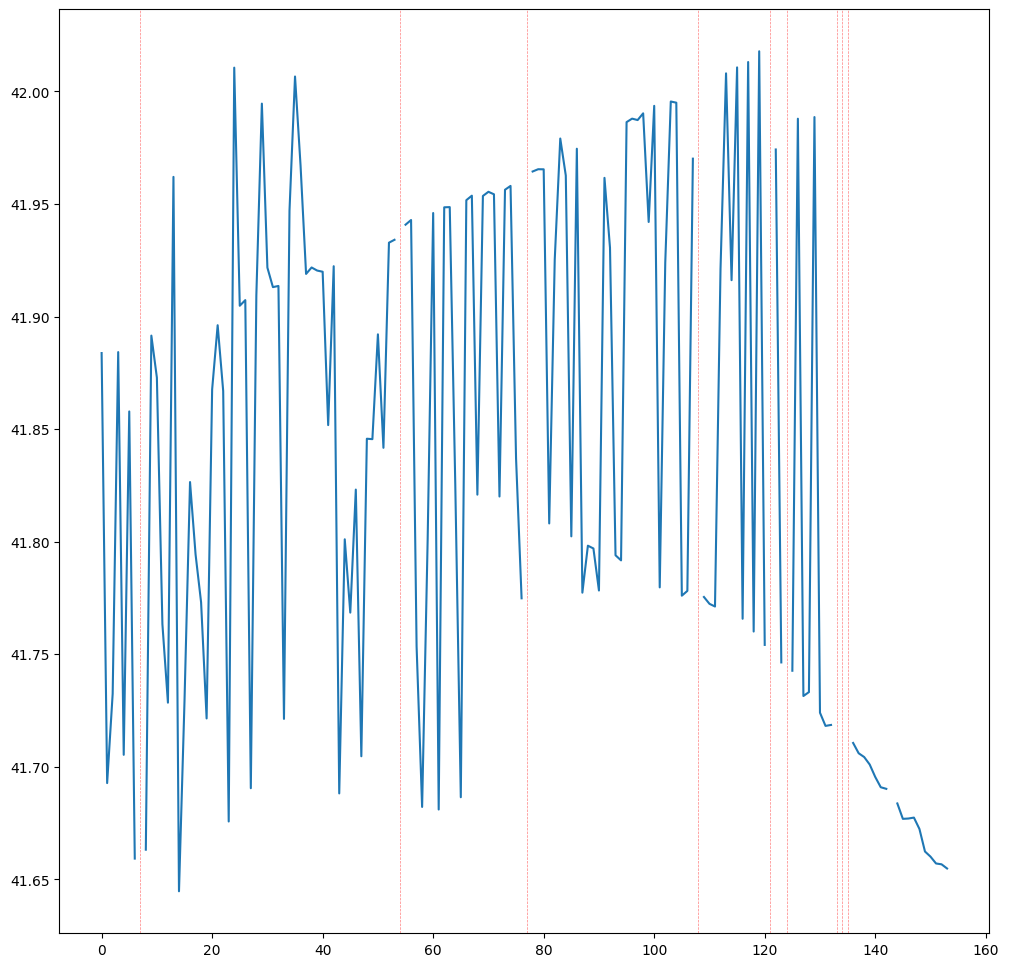

In [85]:
plt.figure(figsize= (12,12))

AddBlock_LatLon[('Lat', 'mean')].plot()

plt.axvline(x=7 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=54 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=77 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=108 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=121 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=124 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=133 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=134 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=135 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)

plt.show()

We can see that there's a continuity between the latitudes: the missing lattitudes fall in the spots where the continuous graph is broken. We can see a similar pattern for longitudes:

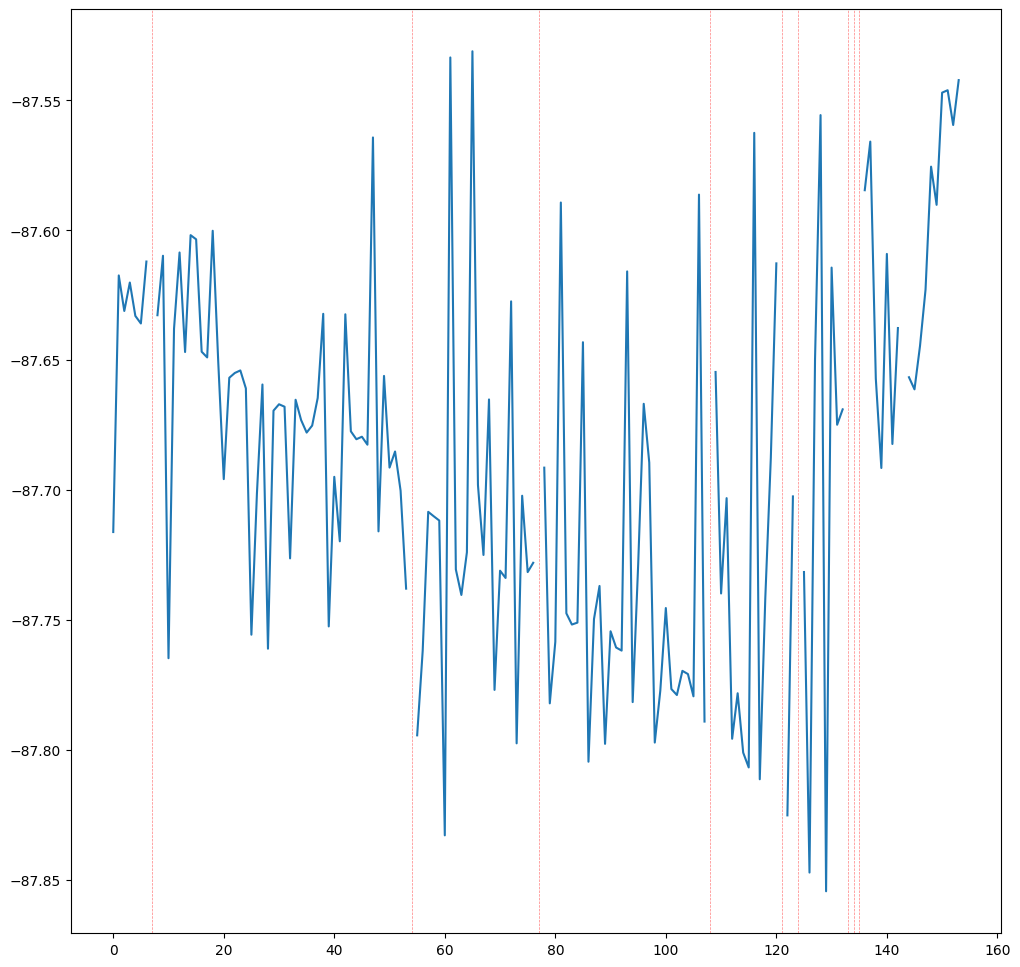

In [86]:
plt.figure(figsize= (12,12))

AddBlock_LatLon[('Lon', 'mean')].plot()

plt.axvline(x=7 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=54 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=77 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=108 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=121 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=124 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=133 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=134 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)
plt.axvline(x=135 ,color='red',label='Lat avg', ls='--', lw= .5,alpha=.5)

plt.show()

#### Ok, now we seem to have a good way of assigning values to the missing values: `Address Blocks`.  
#### We can plausibly assign `Lat` and `Lon` to each `Address Block`'s missing fields based on the neighboring Address Blocks. (The reason this is a plausible move is the proximity of the the lattitudes and longitudes of Address Blocks and Blocks to their neighboring ones, as is suggested by the last two plots.)

Remember: the following are the list of Address blocks with the percentage of their missing values with respect to the dataframe.

In [106]:
# Let's first see the distribution of Lan and Lon before cleaning the data
#sns.scatterplot(data=AddBlock_LatLon, x=('Lat', 'mean'), y= ('Lon', 'mean'),);

In [47]:
df[df['Lat'].isna()][['Address Block']].value_counts() / len(df) *100

Address Block        
100XX W OHARE AIRPORT    8.403880
4XX W 127TH              1.480070
100XX W OHARE            0.997926
79XX S CHICAGO           0.712003
81XX S ASHLAND           0.650334
115XX S AVENUE L         0.179402
65XX N OAK PARK AVE      0.095308
30XX S HOYNE             0.067276
98XX S AVENUE G          0.061670
43XX N ASHLAND           0.056063
dtype: float64

We only replace the top 3's missing values with their neighboring Address Blocks' Lat and Lon

In [85]:
2<4>6

False

Let's find the indices of the blocks near Block  100:

In [87]:
AddBlock_LatLon[(AddBlock_LatLon[('Block','')] < 102)]

,Block,Address Block,Lat,Lon
,,,mean,mean
0,1,1XX N CENTRAL PARK DR,41.883766,-87.716159
1,2,2XX E 111TH ST,41.692775,-87.617365
2,2,2XX W 89TH ST,41.732429,-87.631055
3,3,3XX E RANDOLPH ST,41.884200,-87.620087
4,3,3XX W 104TH ST,41.705328,-87.632955
...,...,...,...,...
132,96,96XX S LONGWOOD DR,41.718596,-87.668926
133,98,98XX S AVENUE G,NaN,NaN
134,100,100XX W OHARE,NaN,NaN


We can see that both linws 132 (for Block 96) and 136 (for block 101) have `Lon` and `Lat` values avaoilable to choose for Block 100.

Let's find the indices of the blocks near Block  4:

In [91]:
AddBlock_LatLon[(AddBlock_LatLon[('Block','')] < 6)]

,Block,Address Block,Lat,Lon
,,,mean,mean
0,1,1XX N CENTRAL PARK DR,41.883766,-87.716159
1,2,2XX E 111TH ST,41.692775,-87.617365
2,2,2XX W 89TH ST,41.732429,-87.631055
3,3,3XX E RANDOLPH ST,41.884200,-87.620087
4,3,3XX W 104TH ST,41.705328,-87.632955
5,3,3XX W 18TH ST,41.857838,-87.635861
6,4,4XX E 130TH ST,41.659237,-87.612014
7,4,4XX W 127TH,NaN,NaN
8,4,4XX W 127TH ST,41.663188,-87.632678


We can see that both lines 6 (for Address Block 4XX E 130TH ST) and 8 (for for Address Block 4XX W 127TH ST) from Block 4 have `Lon` and `Lat` values available to choose for Address Block 4XX W 127TH.

We now assign to Address Blocks' missing `Lat` and `Lon` values the average of the `Lat` and `Lon` of the neighboring Address Blocks.

For example, we assign `AddBlock_LatLon.loc[6, ('Lat', 'mean')]` to any field with Block 4XX W 127TH

We only do this for the top three Address Blocks whose missing value is about 1% of the data or more, and delete the rest of the rows with missing data. This means only replacing the null values for Blocks 4 and 100, and dropping the others.

In [88]:
# Filling Top Missing Lattitudes:

df.loc[df['Address Block'] == '100XX W OHARE AIRPORT', 'Lat'] = df.loc[df['Address Block'] == '100XX W OHARE AIRPORT', 'Lat'].fillna(AddBlock_LatLon.loc[136, ('Lat', 'mean')])
df.loc[df['Address Block'] == '100XX W OHARE', 'Lat'] = df.loc[df['Address Block'] == '100XX W OHARE', 'Lat'].fillna(AddBlock_LatLon.loc[132, ('Lat', 'mean')])
df.loc[df['Address Block'] == '4XX W 127TH', 'Lat'] = df.loc[df['Address Block'] == '4XX W 127TH', 'Lat'].fillna(AddBlock_LatLon.loc[6, ('Lat', 'mean')])

# Filling Top Missing Lattitudes:

df.loc[df['Address Block'] == '100XX W OHARE AIRPORT', 'Lon'] = df.loc[df['Address Block'] == '100XX W OHARE AIRPORT', 'Lon'].fillna(AddBlock_LatLon.loc[136, ('Lon', 'mean')])
df.loc[df['Address Block'] == '100XX W OHARE', 'Lon'] = df.loc[df['Address Block'] == '100XX W OHARE', 'Lon'].fillna(AddBlock_LatLon.loc[132, ('Lon', 'mean')])
df.loc[df['Address Block'] == '4XX W 127TH', 'Lon'] = df.loc[df['Address Block'] == '4XX W 127TH', 'Lon'].fillna(AddBlock_LatLon.loc[6, ('Lon', 'mean')])

##### The top NaN values are now filled:


In [89]:
df[df['Lat'].isna()][['Address Block']].value_counts() / len(df) *100

Address Block      
79XX S CHICAGO         0.712003
81XX S ASHLAND         0.650334
115XX S AVENUE L       0.179402
65XX N OAK PARK AVE    0.095308
30XX S HOYNE           0.067276
98XX S AVENUE G        0.061670
43XX N ASHLAND         0.056063
dtype: float64

In [90]:
df.isna().sum()

Year                 0
Week                 0
Address Block        0
Block                0
Trap                 0
Trap type            0
Date                 0
Mosquito number      0
Mosquito ID          0
WNV Present          0
Species              0
Lat                325
Lon                325
dtype: int64

##### We now drop the rest:

In [91]:
df.dropna(inplace=True)

In [92]:
# Our data is clean now!

df.isna().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

#### Final note on data cleaning:
Instead of assigning the same `Lat` and `Lon` of the closest could alternatively assign the mean or median 

## PART 2. Basic EDA<a class ='author' id='part-2'></a>

## 1. Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

In [114]:
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.710594,-87.584552
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [128]:
df['Date'].apply(lambda x: x.month)

0        9
1        9
2        9
3        9
4        9
        ..
18489    8
18490    9
18491    8
18492    7
18493    8
Name: Date, Length: 17512, dtype: int64

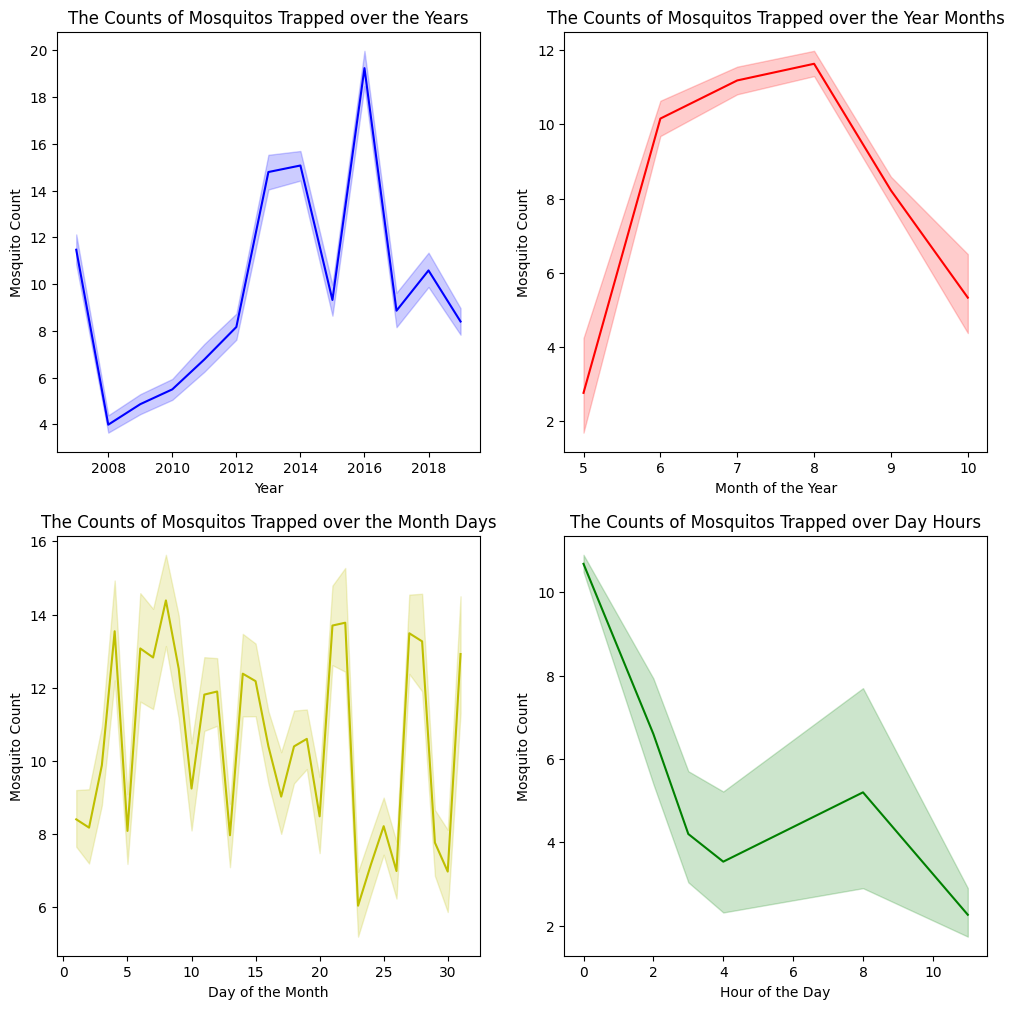

In [97]:
# We create a subplot with 4 canvases to explore the variantion in number of mosquito's in 4 diffeent measures of time:

plt.subplots(2,2,figsize=(12,12))



plt.subplot(2,2,1)
sns.lineplot(data=df, x=df['Date'].apply(lambda x: x.year), y='Mosquito number', color='b')
plt.title('The Counts of Mosquitos Trapped over the Years')
plt.xlabel('Year')
plt.ylabel('Mosquito Count')


plt.subplot(2,2,2)
sns.lineplot(data=df, x=df['Date'].apply(lambda x: x.month), y='Mosquito number',color='r')

plt.title('The Counts of Mosquitos Trapped over the Year Months')
plt.xlabel('Month of the Year')
plt.ylabel('Mosquito Count')

plt.subplot(2,2,3)
plt.title('The Counts of Mosquitos Trapped over the Month Days')
sns.lineplot(data=df, x=df['Date'].apply(lambda x: x.day), y='Mosquito number',color='y')
plt.xlabel('Day of the Month')
plt.ylabel('Mosquito Count')

plt.subplot(2,2,4)
plt.title('The Counts of Mosquitos Trapped over Day Hours')
sns.lineplot(data=df, x=df['Date'].apply(lambda x: x.hour), y='Mosquito number',color='g')
plt.xlabel('Hour of the Day')
plt.ylabel('Mosquito Count')

plt.show()

In [105]:
df['Date'].apply(lambda x: x.month).unique()

array([ 9,  8,  7,  6, 10,  5], dtype=int64)

In [109]:
df['Date'].apply(lambda x: x.hour).unique()

array([ 0,  8,  2, 11,  3,  4], dtype=int64)

#### We can see that the number of mosquitos trapped varries accross different years, years' months, months' days and days' hours:

##### Year:
The number of mosquitos trapped has gone down to its lowest in 2008, peaked in 2013 and 2014, gone down again around 2015, and peaked to its abcolute maximum in 2016. After that, there has been a radical drop in the number of mosquitos trapped.

##### Month: 
The number of mosquitos trapped is highest in months June, July and August, aka. over the summertime.

##### Days: 
The number of mosquitos highly oscilates throught the different days of the months, and I can't see any interesting pattern there.

##### Hours: 
The number of mosquitos trapped is highest at midnight, and from there goes down throughout the day for the most part. 

So the mosquitos tend to be more in numbers during the summer and throughout cooler hours of the day.


### Note: 
The data only gives visivility into certain months of the years (May-October) and days (midnight to 10PM). More data on the missing dates could change our conclusions. This can be seen by running the following codes:

In [110]:
df['Date'].apply(lambda x: x.month).unique()

array([ 9,  8,  7,  6, 10,  5], dtype=int64)

In [111]:
df['Date'].apply(lambda x: x.hour).unique()

array([ 0,  8,  2, 11,  3,  4], dtype=int64)

## PART 3. Advanced EDA<a class ='author' id='part-3'></a>

## 1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

In [155]:
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.710594,-87.584552
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [114]:
# Let's see how many of each insect type we've got:

df['Species'].value_counts()

CULEX RESTUANS      11194
CULEX PIPIENS        5199
CULEX TERRITANS       901
CULEX SALINARIUS      218
Name: Species, dtype: int64

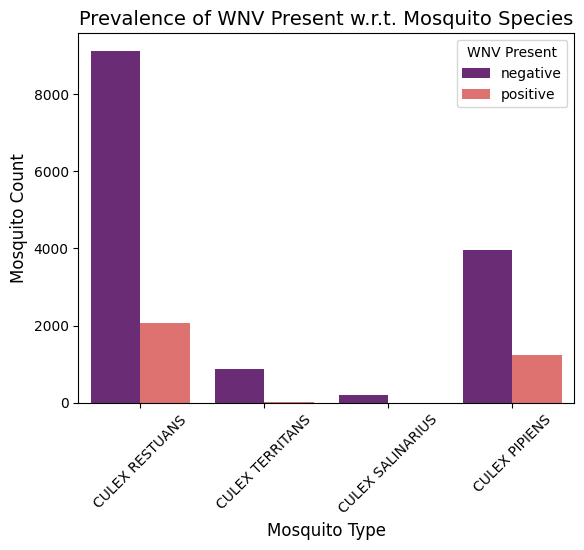

In [122]:
# Let's examine the ditribution of the desease with respect to insect species:

sns.countplot(data=df,x='Species',hue='WNV Present',palette= 'magma')
plt.title('Prevalence of WNV Present w.r.t. Mosquito Species', size=14)
plt.ylabel('Mosquito Count', size=12)
plt.xlabel('Mosquito Type', size=12)
plt.xticks(rotation = 45)
plt.show()

## 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one

In [177]:
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.710594,-87.584552
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [149]:
df['Trap type'].unique()

array(['GRAVID', 'SENTINEL', 'CDC', 'OVI'], dtype=object)

For this exercise I use box plots:

Text(0.5, 1.0, 'Distribution of Caught Mosquitos Over Trap Type')

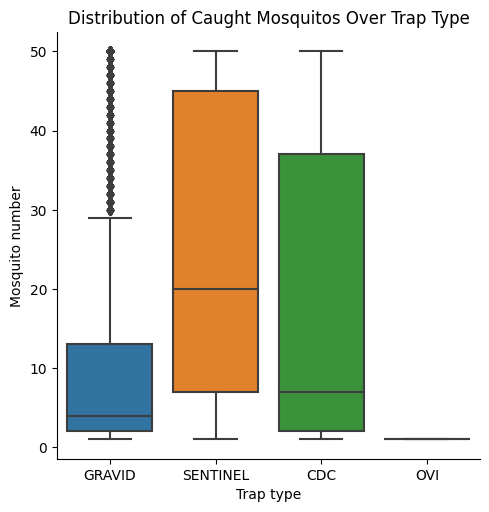

In [151]:
sns.catplot(data=df, x="Trap type", y="Mosquito number", kind="box");
plt.title('Distribution of Caught Mosquitos Over Trap Type')

This graph shows thhe median, inter-quartile range (IQR) and outliers for each trap type. For example, the median of insects caught by the SNTINEL tarp is around 20, about %50 of the caught insects caught range in numbers between around 8 to 45, and so on.

## 3. Using an appropriate visual, come up with an additional insight of your choice.

In [188]:
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.710594,-87.584552
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


I choose scatter plot for this exercise.

The followig graph displays the distribuition of the number of mosquitos over various locations. The more mosquitos trapped at a site, the larger the disc.

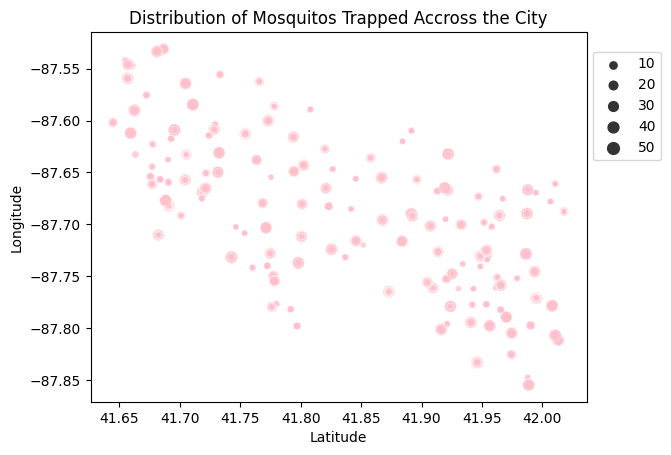

In [171]:
sns.scatterplot(data=df, x= 'Lat', y='Lon',size='Mosquito number', alpha=.7,color='pink');
plt.title('Distribution of Mosquitos Trapped Accross the City')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='center left', bbox_to_anchor=(1,.8),)

plt.show()

This shows that certain spots in the city have been host to more moquitos compared to the other spots.